<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/main/TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os 
os.environ['KAGGLE_CONFIG_DIR']="/content/gdrive/MyDrive/cancer"


In [4]:
%cd /content/gdrive/MyDrive/cancer

/content/gdrive/MyDrive/cancer


In [5]:
!kaggle datasets download -d simjeg/lymphoma-subtype-classification-fl-vs-cll

lymphoma-subtype-classification-fl-vs-cll.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!ls

image_classifier  lymphoma-subtype-classification-fl-vs-cll.zip  X.npy
kaggle.json	  model.png					 Y.npy


In [7]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!unzip lymphoma-subtype-classification-fl-vs-cll.zip

In [12]:
import numpy as np
X = np.load('X.npy') # images
Y = np.load('Y.npy') # labels associated to images (0 = no IDC, 1 = IDC)

In [13]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,Y)

Total number of images: 5547
Number of IDC(-) Images: 2759
Number of IDC(+) Images: 2788
Percentage of positive images: 50.26%
Image shape (Width, Height, Channels): (50, 50, 3)


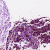

In [14]:
import cv2  
from google.colab.patches import cv2_imshow # for image display
from PIL import Image 
import matplotlib.pylab as plt
imgs0 = X[Y==0] # (0 = no IDC, 1 = IDC)
imgs1 = X[Y==1] 
cv2_imshow(imgs0[100])   

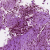

In [15]:
cv2_imshow(imgs1[100])

In [16]:
import sklearn.model_selection as model_selection
X_train, X_test, Y_train, Y_test =  model_selection.train_test_split(X, Y, test_size=0.2)

In [17]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]

X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
X_testFlat[100]

array([211, 138, 172, ..., 211, 157, 189], dtype=uint8)

# AutoML programacion genética
http://epistasislab.github.io/tpot/


In [ ]:
pip install tpot

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=3, population_size=4,  verbosity=2)
tpot.fit(X_trainFlat, Y_train)


In [ ]:
print(tpot.score( X_testFlat, Y_test))
tpot.export('tpot_mnist_pipeline.py')
tpot.fitted_pipeline_